In [1]:
import pandas as pd

import seaborn as sns

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data['Year'] = data.index.year
data['Month'] = data.index.month


In [2]:
data.sort_index(inplace=True)

In [3]:
data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,2013,1
2013-01-01,379,2,0,0,0,0,a,1,2013,1
2013-01-01,378,2,0,0,0,0,a,1,2013,1
2013-01-01,377,2,0,0,0,0,a,1,2013,1
2013-01-01,376,2,0,0,0,0,a,1,2013,1
...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,2015,7
2015-07-31,747,5,10708,826,1,1,0,1,2015,7
2015-07-31,748,5,7481,578,1,1,0,1,2015,7


In [4]:
store1 = data[data['Store']==1]

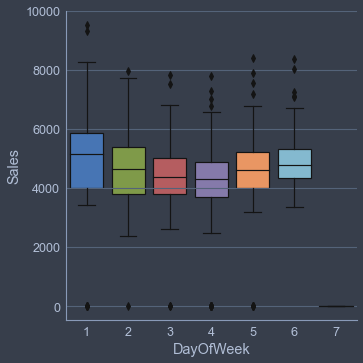

In [5]:
sns.catplot(x ='DayOfWeek', y='Sales',data = store1, kind='box')

store1_open = store1[store1['Open']==1]

store1_open

store1_open[['Sales']].plot()

store1_open[['Customers']].plot()

# Aggregate data

# resample

data[['Sales']].resample('A').mean()

# Median

data[['Sales']].resample('M').median().plot()

#Sales per quarter 
data[['Sales']].resample('Q').sum().plot()

# Rolling Statistics

# rolling fuction
# window of time
# center 

# Sum of daily sales
daily_sales = data[['Sales']].resample('D').sum()

daily_sales

daily_sales.rolling(window = 3, center = True).mean()

# One line strin comment

daily_sales.rolling(window = 100, center = True).mean().plot()

# Expanding Mean

# Sum of quarterly sales
rolling_mean = data['Sales'].resample('Q').sum().rolling(window = 1).mean()
# Expanind of mean of quarterly sales
expanding_mean = data['Sales'].resample('Q').sum().expanding().mean()

import matplotlib.pyplot as plt

fig, ax =  plt.subplots()
rolling_mean.plot(legend=True)
expanding_mean.plot(legend=True)

# Exponentially weighted windows

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

exp_weighted_mean = data['Sales'].resample('Q').sum().ewm(span = 10).mean()

fig, ax =  plt.subplots()
rolling_mean.plot(legend=True)
exp_weighted_mean.plot(legend=True)
ax.legend(['Sales','Exponential Weigted Mean'])

# Stationary time series

store1['Sales'].diff(periods = 7).plot()

# Shifting and Lagging

store1

store1.shift(1)

store1.shift(7)

store1.loc[: ,'previous_day_sale'] = store1['Sales'].shift(1)

store1

store1.loc[: , 'Sales change'] = store1['Sales'] - store1['previous_day_sale']

store1

#Percentage changes
store1.Sales.pct_change()

# Practice

'unemployment.csv'

### 1) Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `datetime` index.


### 2) Plot the unemployment rate.

### 3) Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.


### 4) Calculate the rolling median with `window=5` and `window=15`. Plot both together with the original data.


### 5) Calculate and plot the expanding mean. Resample by quarter. Plot the rolling mean and the expanding mean together.


### 6) Calculate and plot the exponentially weighted sum along with the rolling sum.


# Autocorrelation

In [132]:
store1

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,previous_day_sale,Sales change
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,NaN,NaN
2015-07-30,1,4,5020,546,1,1,0,1,2015,7,5263.0,-243.0
2015-07-29,1,3,4782,523,1,1,0,1,2015,7,5020.0,-238.0
2015-07-28,1,2,5011,560,1,1,0,1,2015,7,4782.0,229.0
2015-07-27,1,1,6102,612,1,1,0,1,2015,7,5011.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1,6,4997,635,1,0,0,1,2013,1,0.0,4997.0
2013-01-04,1,5,4486,619,1,0,0,1,2013,1,4997.0,-511.0
2013-01-03,1,4,4327,578,1,0,0,1,2013,1,4486.0,-159.0


In [134]:
store1['Sales'].autocorr(lag = 1)

-0.12732514339140213

In [135]:
store1['Sales'].autocorr(lag = 10)

0.0063076238937893915

In [136]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

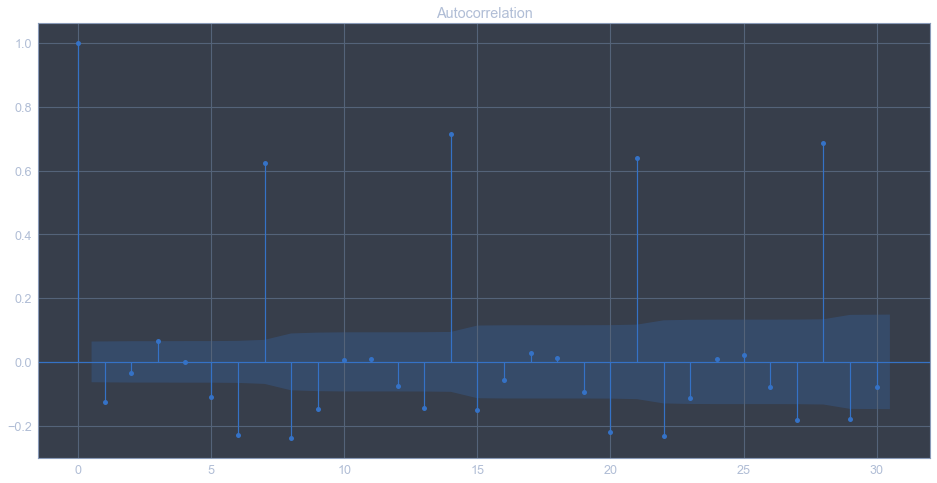

In [145]:
plot_acf(store1['Sales'].values, lags = 30)
plt.show()

In [12]:
store1_data = store1[['Sales']]

In [24]:
train = store1_data[:753]

In [25]:
train

,Sales
Date,
2013-01-01,0
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
...,...
2015-01-19,3721
2015-01-20,3680
2015-01-21,3299


In [27]:
test = store1_data[-189:]

In [28]:
test

,Sales
Date,
2015-01-24,4840
2015-01-25,0
2015-01-26,4781
2015-01-27,4806
2015-01-28,4310
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


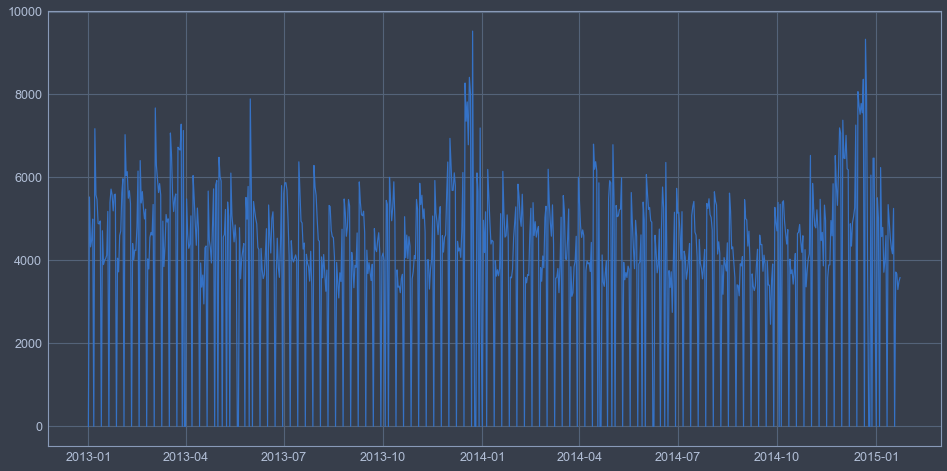

In [29]:
plt.plot(train)

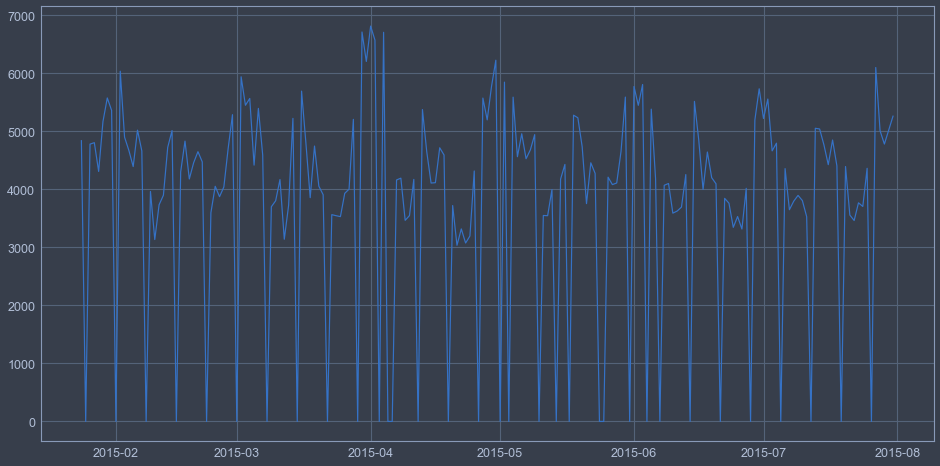

In [30]:
plt.plot(test)

In [39]:
arima_model = auto_arima(train, seasonal=True, stepwise=True,random_state = 1)

In [32]:
from pmdarima import auto_arima

In [40]:
arima_model

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [41]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 189), index = test.index)

<AxesSubplot:xlabel='Date'>

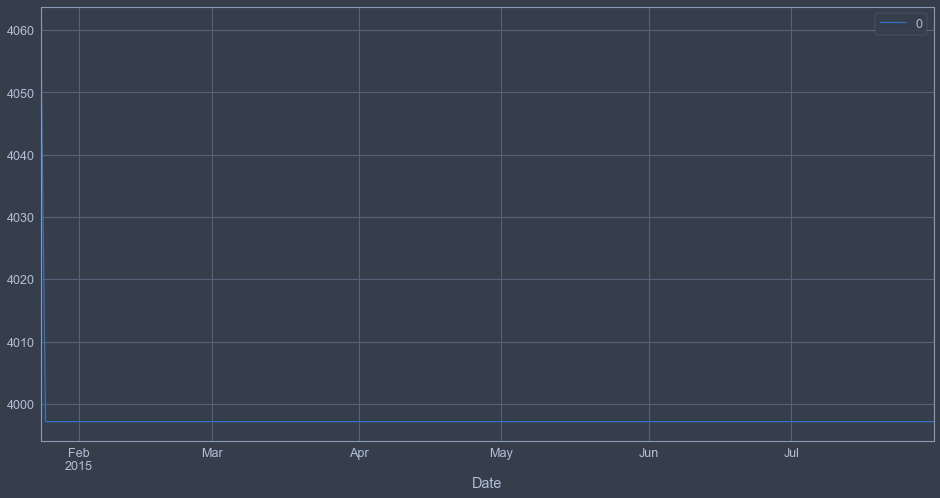

In [42]:
prediction.plot()